In [86]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [87]:
df = pd.read_csv('macros_2.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,Balance_Curr_Acc,Public_debt,GDP,M2SL,USD to JPY,USD to EUR,USD to GBP,year,month,day_of_week,Int_rate
DATE,,,,,,,,,,,
1999-01-04,-262.217,5638780.0,13426.748,4425.3,0.008917,1.1812,1.6581,1999,1,0,5.04
1999-01-05,-262.217,5638780.0,13426.748,4425.3,0.008997,1.1760,1.6566,1999,1,1,4.54
1999-01-06,-262.217,5638780.0,13426.748,4425.3,0.008867,1.1636,1.6547,1999,1,2,4.23
1999-01-07,-262.217,5638780.0,13426.748,4425.3,0.008953,1.1672,1.6495,1999,1,3,4.49
1999-01-08,-262.217,5638780.0,13426.748,4425.3,0.008967,1.1554,1.6405,1999,1,4,4.74
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18,-934.571,30928912.0,21851.134,20783.6,0.006706,1.0886,1.2736,2024,3,0,5.33
2024-03-19,-934.571,30928912.0,21851.134,20783.6,0.006634,1.0859,1.2713,2024,3,1,5.33
2024-03-20,-934.571,30928912.0,21851.134,20783.6,0.006594,1.0856,1.2713,2024,3,2,5.33


### feature enginering and data preparation
extracting time relevant features, creating lagged features for each target and capture past information
use rolling windows to incorporate trends and volatility

In [89]:
data = df

In [90]:
data.to_csv('macros_updated.csv')

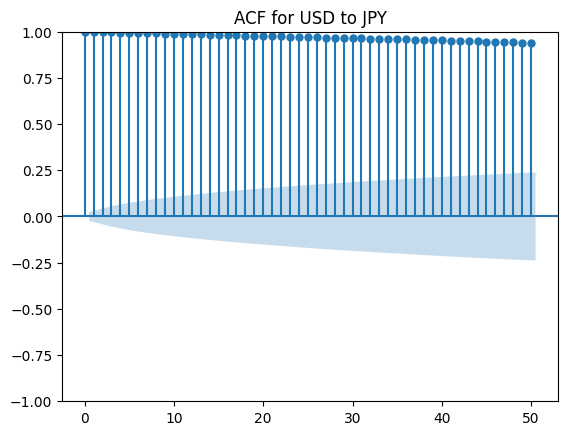

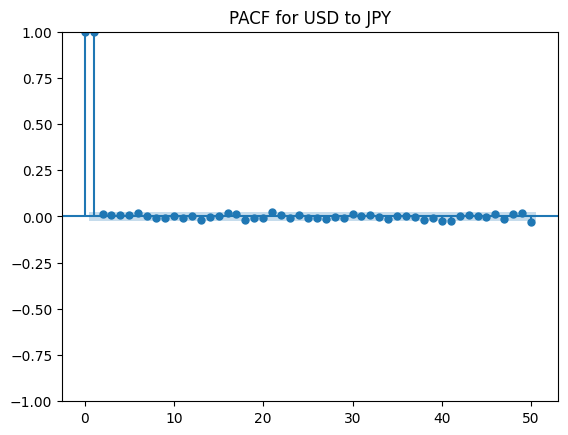

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# For USD to JPY
plot_acf(data['USD to JPY'].dropna(), lags=50, title='ACF for USD to JPY')
plot_pacf(data['USD to JPY'].dropna(), lags=50, title='PACF for USD to JPY')
plt.show()

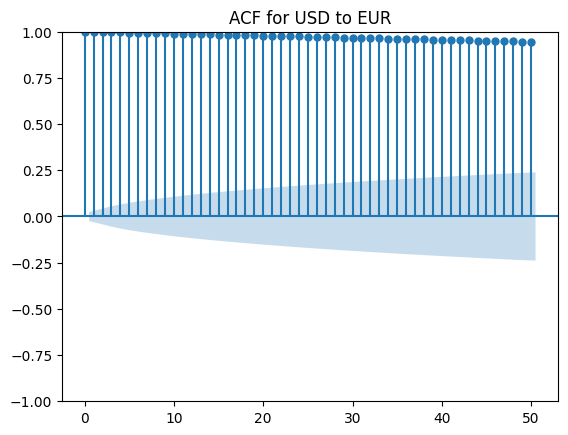

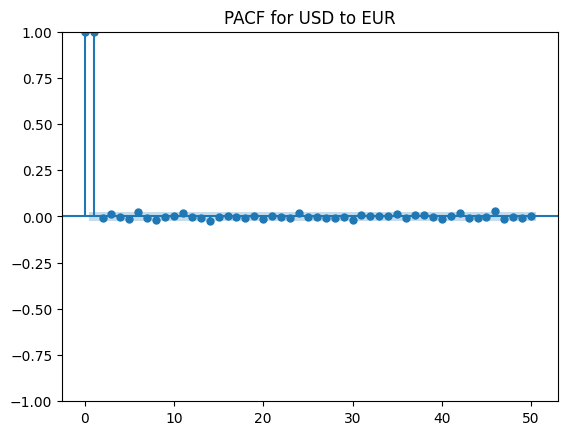

In [93]:
plot_acf(data['USD to EUR'].dropna(), lags=50, title='ACF for USD to EUR')
plot_pacf(data['USD to EUR'].dropna(), lags=50, title='PACF for USD to EUR')
plt.show()

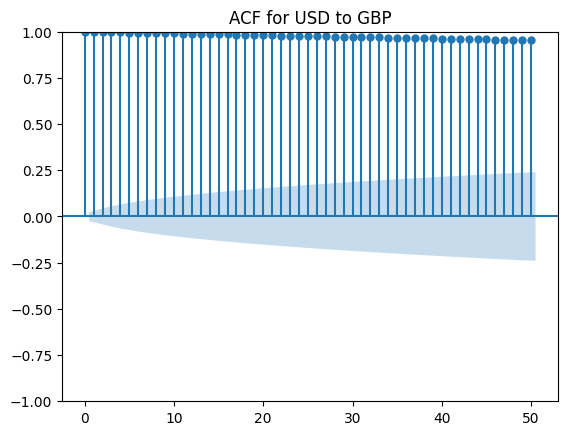

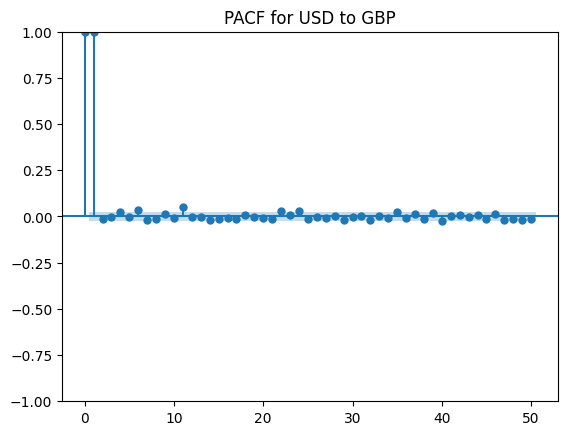

In [94]:
plot_acf(data['USD to GBP'].dropna(), lags=50, title='ACF for USD to GBP')
plot_pacf(data['USD to GBP'].dropna(), lags=50, title='PACF for USD to GBP')
plt.show()

In [95]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf

# Calculate ACF and PACF for 'USD to JPY', 'USD to EUR', 'USD to GBP'
lags = 20  # Number of lags to calculate
results = {}

for currency in ['USD to JPY', 'USD to EUR', 'USD to GBP']:
    results[currency] = {
        'ACF': acf(data[currency].dropna(), nlags=lags, fft=True),
        'PACF': pacf(data[currency].dropna(), nlags=lags, method='ols')
    }

# Display the ACF and PACF results for each currency
results


{'USD to JPY': {'ACF': array([1.        , 0.99873161, 0.99749925, 0.9962885 , 0.99510197,
         0.99393799, 0.99282406, 0.99171119, 0.99057943, 0.98942727,
         0.98828635, 0.98712918, 0.98597867, 0.9847847 , 0.98358289,
         0.98239113, 0.98124552, 0.98012881, 0.97896387, 0.97777903,
         0.97657655]),
  'PACF': array([ 1.00000000e+00,  9.99348750e-01,  1.84156690e-02,  1.39012422e-02,
          6.50971333e-03,  3.13970713e-03,  2.25510310e-02,  5.32352414e-04,
         -1.02068747e-02, -1.16433075e-02,  1.67465822e-03, -7.56003105e-03,
          7.36981920e-03, -1.72864749e-02,  9.19516863e-04,  5.24251532e-03,
          2.29914704e-02,  1.66648963e-02, -1.99659671e-02, -1.23289440e-02,
         -9.26380267e-03])},
 'USD to EUR': {'ACF': array([1.        , 0.99895319, 0.99788937, 0.99685289, 0.99580959,
         0.99473322, 0.9937072 , 0.9926692 , 0.99158898, 0.99050046,
         0.98942379, 0.98838873, 0.987346  , 0.9862894 , 0.98518788,
         0.98408209, 0.9829840

1. USD to JPY
ACF: The ACF values remain very high even at 20 lags, indicating a strong and persistent autocorrelation. This suggests that past values have a significant influence on future values, and the series may be non-stationary.
PACF: The PACF drops sharply after the first lag and then remains very low, indicating that most of the autocorrelation in the data is captured by the first lag. This suggests an AR(1) model might be a good starting point for modeling.
2. USD to EUR
ACF: Similar to USD to JPY, the ACF values decrease slowly, which again suggests strong autocorrelation over time and potential non-stationarity.
PACF: The PACF shows a significant negative correlation at the second lag, and other lags occasionally show significant values both positive and negative. This indicates a more complex dynamic, possibly suggesting an ARIMA model with both AR and MA components.
3. USD to GBP
ACF: The ACF values are very high and decrease gradually, similar to the other two currencies, suggesting strong autocorrelation and the importance of historical values.
PACF: After the first significant positive value, the PACF shows significant values at several lags, including notable positives and negatives. This indicates complex dynamics that could require a higher-order ARIMA model.

In [96]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit

# Assuming 'data' has DATE as the index already
data = pd.read_csv('macros_updated.csv', index_col='DATE', parse_dates=True)
data.head()

,Balance_Curr_Acc,Public_debt,GDP,M2SL,USD to JPY,USD to EUR,USD to GBP,year,month,day_of_week,Int_rate
DATE,,,,,,,,,,,
1999-01-04,-262.217,5638780.0,13426.748,4425.3,0.008917,1.1812,1.6581,1999,1,0,5.04
1999-01-05,-262.217,5638780.0,13426.748,4425.3,0.008997,1.1760,1.6566,1999,1,1,4.54
1999-01-06,-262.217,5638780.0,13426.748,4425.3,0.008867,1.1636,1.6547,1999,1,2,4.23
1999-01-07,-262.217,5638780.0,13426.748,4425.3,0.008953,1.1672,1.6495,1999,1,3,4.49
1999-01-08,-262.217,5638780.0,13426.748,4425.3,0.008967,1.1554,1.6405,1999,1,4,4.74


In [98]:
# Feature engineering: Lagged and rolling features
lags = 3
for target in ['USD to JPY', 'USD to EUR', 'USD to GBP']:
    for lag in range(1, lags + 1):
        data[f'{target}_lag{lag}'] = data[target].shift(lag)
    window = 7
    data[f'{target}_rolling_mean'] = data[target].rolling(window=window).mean()
    data[f'{target}_rolling_std'] = data[target].rolling(window=window).std()

In [99]:
data.fillna(method='ffill', inplace=True)  # Forward fill
data.fillna(method='bfill', inplace=True)  # Backward fill if any NaNs remain

In [100]:
data.isna().sum()

Balance_Curr_Acc           0
Public_debt                0
GDP                        0
M2SL                       0
USD to JPY                 0
USD to EUR                 0
USD to GBP                 0
year                       0
month                      0
day_of_week                0
Int_rate                   0
USD to JPY_lag1            0
USD to JPY_lag2            0
USD to JPY_lag3            0
USD to JPY_rolling_mean    0
USD to JPY_rolling_std     0
USD to EUR_lag1            0
USD to EUR_lag2            0
USD to EUR_lag3            0
USD to EUR_rolling_mean    0
USD to EUR_rolling_std     0
USD to GBP_lag1            0
USD to GBP_lag2            0
USD to GBP_lag3            0
USD to GBP_rolling_mean    0
USD to GBP_rolling_std     0
dtype: int64

In [ ]:
# Prepare features and targets (assuming 'USD to JPY' as the example target)
X = data.drop(['USD to JPY', 'USD to EUR', 'USD to GBP'], axis=1)
y = data['USD to JPY']

In [ ]:
# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    params = {'max_depth': 5, 'eta': 0.1, 'subsample': 0.7, 'colsample_bytree': 0.8,
              'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
    model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')])

    predictions = model.predict(dtest)

[0]	test-rmse:0.00047
[1]	test-rmse:0.00042
[2]	test-rmse:0.00038
[3]	test-rmse:0.00035
[4]	test-rmse:0.00031
[5]	test-rmse:0.00028
[6]	test-rmse:0.00026
[7]	test-rmse:0.00023
[8]	test-rmse:0.00021
[9]	test-rmse:0.00019
[10]	test-rmse:0.00018
[11]	test-rmse:0.00016
[12]	test-rmse:0.00015
[13]	test-rmse:0.00014
[14]	test-rmse:0.00013
[15]	test-rmse:0.00012
[16]	test-rmse:0.00011
[17]	test-rmse:0.00010
[18]	test-rmse:0.00010
[19]	test-rmse:0.00009
[20]	test-rmse:0.00009
[21]	test-rmse:0.00008
[22]	test-rmse:0.00008
[23]	test-rmse:0.00008
[24]	test-rmse:0.00008
[25]	test-rmse:0.00007
[26]	test-rmse:0.00007
[27]	test-rmse:0.00007
[28]	test-rmse:0.00007
[29]	test-rmse:0.00007
[30]	test-rmse:0.00007
[31]	test-rmse:0.00007
[32]	test-rmse:0.00007
[33]	test-rmse:0.00007
[34]	test-rmse:0.00007
[35]	test-rmse:0.00007
[36]	test-rmse:0.00007
[37]	test-rmse:0.00007
[38]	test-rmse:0.00007
[39]	test-rmse:0.00007
[40]	test-rmse:0.00007
[41]	test-rmse:0.00007
[42]	test-rmse:0.00007
[43]	test-rmse:0.0000

[83]	test-rmse:0.00007
[84]	test-rmse:0.00007
[85]	test-rmse:0.00007
[86]	test-rmse:0.00007
[87]	test-rmse:0.00007
[88]	test-rmse:0.00007
[89]	test-rmse:0.00007
[90]	test-rmse:0.00007
[91]	test-rmse:0.00007
[92]	test-rmse:0.00007
[93]	test-rmse:0.00007
[94]	test-rmse:0.00007
[95]	test-rmse:0.00007
[96]	test-rmse:0.00007
[97]	test-rmse:0.00007
[98]	test-rmse:0.00007
[99]	test-rmse:0.00007
[0]	test-rmse:0.00211
[1]	test-rmse:0.00205
[2]	test-rmse:0.00199
[3]	test-rmse:0.00194
[4]	test-rmse:0.00190
[5]	test-rmse:0.00185
[6]	test-rmse:0.00182
[7]	test-rmse:0.00178
[8]	test-rmse:0.00174
[9]	test-rmse:0.00172
[10]	test-rmse:0.00169
[11]	test-rmse:0.00167
[12]	test-rmse:0.00165
[13]	test-rmse:0.00163
[14]	test-rmse:0.00162
[15]	test-rmse:0.00161
[16]	test-rmse:0.00159
[17]	test-rmse:0.00158
[18]	test-rmse:0.00158
[19]	test-rmse:0.00157
[20]	test-rmse:0.00156
[21]	test-rmse:0.00156
[22]	test-rmse:0.00155
[23]	test-rmse:0.00155
[24]	test-rmse:0.00153
[25]	test-rmse:0.00153
[26]	test-rmse:0.0015

KeyboardInterrupt: 

I am using time series cross-validation, where I split the data into 5 based on the date
Now, since XGBoost doesn't support a multi-output regression, I run optuna for hyperparameter tuning with optuna separately for the exchange rate columns

In [101]:
import optuna
import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

X = data.drop(['USD to JPY', 'USD to EUR', 'USD to GBP'], axis=1)
y = data['USD to GBP']

# Time Series Cross-Validation setup
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

def objective(trial):
    param = {
        'tree_method':'hist',  # CPU-based method
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.6, 0.7, 0.8, 0.9, 1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.02, 0.05, 0.1]),
        'n_estimators': 100,
        'max_depth': trial.suggest_categorical('max_depth', [3, 5, 7, 9, 11]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42
    }
    rmse_list = []
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        model = xgb.XGBRegressor(**param)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)
        preds = model.predict(X_test)
        rmse = mean_squared_error(y_test, preds, squared=False)
        rmse_list.append(rmse)
    average_rmse = sum(rmse_list) / len(rmse_list)
    return average_rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

print("Number of finished trials:", len(study.trials))
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2024-04-16 16:00:16,937] A new study created in memory with name: no-name-571e98e4-9b2b-4249-b48f-58442a4f644f
C:\Users\aghab\AppData\Local\Temp\ipykernel_14704\3958484570.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\aghab\AppData\Local\Temp\ipykernel_14704\3958484570.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_sto

KeyboardInterrupt: 

y = data['USD to JPY']
Number of finished trials: 500
Best trial:
  Value: 0.0004667083224163445
  Params: 
    lambda: 0.02609231592907089
    alpha: 0.0010001746794063894
    colsample_bytree: 0.8
    subsample: 1.0
    learning_rate: 0.1
    max_depth: 5
    min_child_weight: 7

y = data['USD to EUR']
Number of finished trials: 500
Best trial:
  Value: 0.04339433530142854
  Params: 
    lambda: 0.12585485166617774
    alpha: 0.0010082058092605384
    colsample_bytree: 0.6
    subsample: 1.0
    learning_rate: 0.1
    max_depth: 3
    min_child_weight: 1

y = data['USD to GBP']
Number of finished trials: 500
Best trial:
  Value: 0.06672435138375003
  Params: 
    lambda: 0.008121203736549001
    alpha: 0.001358262664306978
    colsample_bytree: 0.9
    subsample: 0.8
    learning_rate: 0.1
    max_depth: 3
    min_child_weight: 10